# Task :
#### 1. Data Cleaning and Exploratory Data Analysis (EDA)
#### 2. Customer Segmentation using RFM analysis ***************************************
#### 3. Customer Segmentation using K-Means, Hierarchical and DBSCAN
#### 4. Analysis of customer retention rates using Cohort Analysis *********************

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('E-com_Data.csv')
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


# Part 1 : Data Cleaning and EDA

#### a) Identifying missing values and noise in the dataset
#### b) Cleaning and visualizing the data
#### b) Conducting analyses by invoice, product, other variable

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  float64
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


In [4]:
# CustomerID  - Mandatory
# InvoieNo - Frequency
# Date of purchase - Recency
# Price - Monetory

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,404189.0,2181.909035,1252.681881,2.0,1207.0,2078.0,3291.0,4372.0
InvoieNo,537979.0,385017.572063,13426.052649,361429.0,372961.0,385706.0,396873.0,406651.0
Quantity,537979.0,9.343339,27.623322,-2003.0,1.0,3.0,10.0,3186.0
price per Unit,537979.0,378.339062,440.048823,1.0,169.0,261.0,456.0,64973.0
Price,537979.0,2161.414593,4538.487177,-10152.0,451.0,1194.0,2232.0,90400.0
Sold as set,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['CustomerID', 'Item Code', 'InvoieNo', 'Date of purchase', 'Quantity',
       'Time', 'price per Unit', 'Price', 'Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set'],
      dtype='object')

In [7]:
drop_columns = ['Item Code','Quantity','Time', 'price per Unit','Shipping Location','Cancelled_status', 'Reason of return', 'Sold as set']
df.drop(drop_columns, axis=1, inplace=True)

In [8]:
df.head()

,CustomerID,InvoieNo,Date of purchase,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


In [9]:
df.duplicated().sum()

6008

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.Price.min()

-10152.0

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,402859.0,2182.187224,1252.636483,2.0,1207.0,2078.0,3291.0,4372.0
InvoieNo,535107.0,385009.702116,13418.210488,361429.0,372964.0,385665.0,396811.0,406651.0
Price,535107.0,2167.848915,4547.338495,-10152.0,453.0,1200.0,2236.0,90400.0


In [14]:
def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/ df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=["missing_number","missing_percent"])
    return missing_values[missing_values["missing_number"]>0]
missing_values(df)

,missing_number,missing_percent
CustomerID,132249,0.247145
InvoieNo,1,0.000002
Date of purchase,1,0.000002
Price,1,0.000002


In [15]:
df.isnull().sum().sort_values(ascending=False)

CustomerID          132249
InvoieNo                 1
Date of purchase         1
Price                    1
dtype: int64

In [16]:
(df.isnull().sum()/ df.isnull().count()).sort_values(ascending=False)

CustomerID          0.247145
InvoieNo            0.000002
Date of purchase    0.000002
Price               0.000002
dtype: float64

In [17]:
df = df.dropna(subset=['CustomerID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402859 entries, 0 to 537949
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CustomerID        402859 non-null  float64
 1   InvoieNo          402859 non-null  float64
 2   Date of purchase  402859 non-null  object 
 3   Price             402859 non-null  float64
dtypes: float64(3), object(1)
memory usage: 15.4+ MB


In [18]:
(df.isnull().sum()/ df.isnull().count()).sort_values(ascending=False)

CustomerID          0.0
InvoieNo            0.0
Date of purchase    0.0
Price               0.0
dtype: float64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402859 entries, 0 to 537949
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CustomerID        402859 non-null  float64
 1   InvoieNo          402859 non-null  float64
 2   Date of purchase  402859 non-null  object 
 3   Price             402859 non-null  float64
dtypes: float64(3), object(1)
memory usage: 15.4+ MB


In [20]:
import datetime
df['Date of purchase'] = pd.to_datetime(df['Date of purchase'])

In [21]:
df = df.rename( columns = {'InvoieNo': "InvoiceNo", "Date of purchase":"Date"})

In [22]:
df.head()

,CustomerID,InvoiceNo,Date,Price
0,4355.0,398177.0,2017-10-29,1926.0
1,4352.0,394422.0,2017-05-10,1740.0
2,4352.0,394422.0,2017-12-10,1866.0
3,4352.0,388633.0,2017-08-22,1869.0
4,4352.0,394422.0,2017-10-10,1888.0


In [23]:
df['Date'].describe().T

count                  402859
unique                    381
top       2017-11-24 00:00:00
freq                     2507
first     2016-02-12 00:00:00
last      2017-12-19 00:00:00
Name: Date, dtype: object

In [24]:
df['CustomerID'].nunique()

4349

In [25]:
new_date = datetime.datetime(2017,12,20)
new_date

datetime.datetime(2017, 12, 20, 0, 0)

In [26]:
df['CustomerID']==4352.0

0         False
1          True
2          True
3          True
4          True
          ...  
537945    False
537946    False
537947    False
537948    False
537949    False
Name: CustomerID, Length: 402859, dtype: bool

# Customer Segmentation using RFM analysis

##### **RFM Analysis** : is a marketing techniques and method used to evaluate customer behavior
###### RFM stands for **Recency**, **Frequency**, and **Monetary**

- **Recency:** Indicates how recently a customer has made a purchase. Customer who have purchased more recently have a higher recency score.
- **Frequency:** Represents how many times a customer has made a purchase within a specific time period(typically within a year). Customer who
purchase more frequently have a higher frequency score

- **Monetary:** Refers to the total amount a customer has spent within a specific time period. Customer who spend more have a higher monetary score.

- A Score of **5** represent the best customers (most recent, most frequent, and highest spending)
- A score of **1** represent the lease engaged customers.

- **Prime (vip) Customers**
- **Loyal customers**
- **Potential customer**

In [27]:
RFMApproach = df.groupby('CustomerID').agg({'Date': lambda x: (new_date - x.max()).days,
                                            'InvoiceNo': lambda x: x.count(),
                                            'Price': lambda x: x.sum()})
RFMApproach.rename(columns = {'Date':'Recency', 'InvoiceNo':'Frequency','Price':'Monetary'}, inplace=True)
RFMApproach.reset_index()

,CustomerID,Recency,Frequency,Monetary
0,2.0,4,181,550416.0
1,3.0,77,27,257404.0
2,4.0,20,72,176613.0
3,5.0,18,16,41976.0
4,6.0,9,84,151822.0
...,...,...,...,...
4344,4368.0,17,10,20480.0
4345,4369.0,181,7,10774.0
4346,4370.0,12,13,24962.0
4347,4371.0,4,751,279720.0


In [28]:
RFMApproach.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4349.0,61.445160,89.656941,1.0,10.0,19.0,73.0,617.0
Frequency,4349.0,92.632559,230.742279,1.0,17.0,42.0,101.0,7919.0
Monetary,4349.0,229493.932881,855668.518674,-50372.0,38140.0,83635.0,205444.0,35472089.0


In [29]:
# Split the data into 4 segment basis quantile method

quantiles = RFMApproach.quantile(q=[0.25, 0.50, 0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 10.0, 0.5: 19.0, 0.75: 73.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetary': {0.25: 38140.0, 0.5: 83635.0, 0.75: 205444.0}}

In [30]:
def Recency_value(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

In [31]:
def Freq_Mont_value(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [32]:
RFMApproach['R'] = RFMApproach['Recency'].apply(Recency_value, args=('Recency', quantiles))
RFMApproach['F'] = RFMApproach['Frequency'].apply(Freq_Mont_value, args=('Frequency', quantiles))
RFMApproach['M'] = RFMApproach['Monetary'].apply(Freq_Mont_value, args=('Monetary', quantiles))

In [33]:
RFMApproach.reset_index()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,2.0,4,181,550416.0,1,1,1
1,3.0,77,27,257404.0,4,3,1
2,4.0,20,72,176613.0,3,2,2
3,5.0,18,16,41976.0,2,4,3
4,6.0,9,84,151822.0,1,2,2
...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4
4345,4369.0,181,7,10774.0,4,4,4
4346,4370.0,12,13,24962.0,2,4,4
4347,4371.0,4,751,279720.0,1,1,1


In [34]:
RFMApproach['RFM'] = RFMApproach[['R','F','M']].sum(axis=1)
RFMApproach.reset_index()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM
0,2.0,4,181,550416.0,1,1,1,3
1,3.0,77,27,257404.0,4,3,1,8
2,4.0,20,72,176613.0,3,2,2,7
3,5.0,18,16,41976.0,2,4,3,9
4,6.0,9,84,151822.0,1,2,2,5
...,...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4,10
4345,4369.0,181,7,10774.0,4,4,4,12
4346,4370.0,12,13,24962.0,2,4,4,10
4347,4371.0,4,751,279720.0,1,1,1,3


In [35]:
RFMApproach.to_csv('RFMApproach.csv')

In [36]:
RFMApproach['RFM'].value_counts()

3     509
10    480
9     460
8     451
7     439
12    408
11    404
5     402
6     399
4     397
Name: RFM, dtype: int64

In [37]:
Loyality_Level = ['platinum','gold','silver','bronze']
score_cuts = pd.qcut(RFMApproach.RFM, q=4, labels=Loyality_Level)
RFMApproach['Loyality_Level'] = score_cuts.values
RFMApproach


,Recency,Frequency,Monetary,R,F,M,RFM,Loyality_Level
CustomerID,,,,,,,,
2.0,4,181,550416.0,1,1,1,3,platinum
3.0,77,27,257404.0,4,3,1,8,gold
4.0,20,72,176613.0,3,2,2,7,gold
5.0,18,16,41976.0,2,4,3,9,silver
6.0,9,84,151822.0,1,2,2,5,platinum
...,...,...,...,...,...,...,...,...
4368.0,17,10,20480.0,2,4,4,10,silver
4369.0,181,7,10774.0,4,4,4,12,bronze
4370.0,12,13,24962.0,2,4,4,10,silver


In [38]:
RFMApproach=RFMApproach.reset_index()
RFMApproach

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,Loyality_Level
0,2.0,4,181,550416.0,1,1,1,3,platinum
1,3.0,77,27,257404.0,4,3,1,8,gold
2,4.0,20,72,176613.0,3,2,2,7,gold
3,5.0,18,16,41976.0,2,4,3,9,silver
4,6.0,9,84,151822.0,1,2,2,5,platinum
...,...,...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4,10,silver
4345,4369.0,181,7,10774.0,4,4,4,12,bronze
4346,4370.0,12,13,24962.0,2,4,4,10,silver
4347,4371.0,4,751,279720.0,1,1,1,3,platinum


In [39]:
RFMApproach['Loyality_Level'].value_counts()

platinum    1308
gold        1289
silver       940
bronze       812
Name: Loyality_Level, dtype: int64

In [40]:
RFMApproach.to_csv('Loyality_Level.csv')

In [41]:
RFMApproach.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R', 'F', 'M', 'RFM',
       'Loyality_Level'],
      dtype='object')

In [42]:
final_report = RFMApproach.groupby('Loyality_Level')[['Recency', 'Frequency', 'Monetary','CustomerID']].agg({'Recency': 'sum', 
                                                                                                             'Frequency': 'sum',
                                                                                                             'Monetary':'sum',
                                                                                                             'CustomerID':'nunique'}).reset_index()

In [43]:
final_report

,Loyality_Level,Recency,Frequency,Monetary,CustomerID
0,platinum,13340,297150,765731356.0,1308
1,gold,42079,73994,160271639.0,1289
2,silver,78927,23588,52766014.1,940
3,bronze,132879,8127,19300105.0,812


In [44]:
final_report = final_report.rename(columns = {'CustomerID':'NumBuyers'})
final_report

,Loyality_Level,Recency,Frequency,Monetary,NumBuyers
0,platinum,13340,297150,765731356.0,1308
1,gold,42079,73994,160271639.0,1289
2,silver,78927,23588,52766014.1,940
3,bronze,132879,8127,19300105.0,812


In [45]:
final_report['Percent'] = round(final_report['NumBuyers'] / final_report.NumBuyers.sum()*100,2)

In [46]:
final_report

,Loyality_Level,Recency,Frequency,Monetary,NumBuyers,Percent
0,platinum,13340,297150,765731356.0,1308,30.08
1,gold,42079,73994,160271639.0,1289,29.64
2,silver,78927,23588,52766014.1,940,21.61
3,bronze,132879,8127,19300105.0,812,18.67


In [47]:
final_report_1 = final_report[['Loyality_Level','NumBuyers','Percent']]
final_report_1

,Loyality_Level,NumBuyers,Percent
0,platinum,1308,30.08
1,gold,1289,29.64
2,silver,940,21.61
3,bronze,812,18.67


In [51]:
pip install squarify


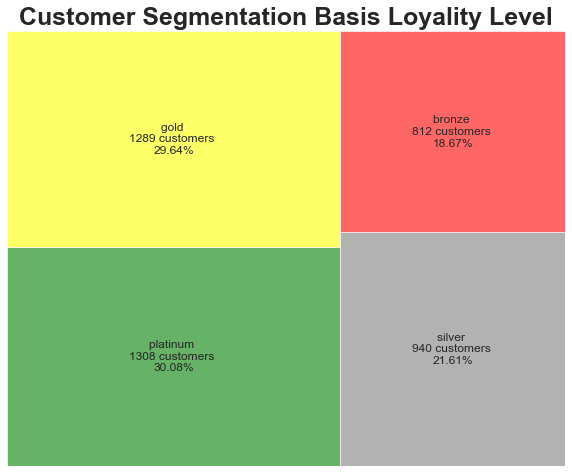

In [52]:
import squarify
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(10,8)
colors_dics = {'platinum':'green', 'gold':'yellow', 'silver':'gray', 'bronze':'red'}

squarify.plot(sizes=final_report_1['NumBuyers'], color = colors_dics.values(), 
              label = ['{} \n{:0.0f} customers \n{}%'.format(*final_report_1.iloc[i]) for i in range(0, len(final_report_1))], alpha=0.6)
plt.title("Customer Segmentation Basis Loyality Level", fontsize=25, fontweight="bold")
plt.axis('off')
plt.show()

# Unsupervised Machine Learning - Segmentation/Clustering/Grouping

In [53]:
# Importing Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import scipy.cluster.hierarchy as sch
from datetime import datetime

In [54]:
RFMApproach.reset_index()

,index,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,Loyality_Level
0,0,2.0,4,181,550416.0,1,1,1,3,platinum
1,1,3.0,77,27,257404.0,4,3,1,8,gold
2,2,4.0,20,72,176613.0,3,2,2,7,gold
3,3,5.0,18,16,41976.0,2,4,3,9,silver
4,4,6.0,9,84,151822.0,1,2,2,5,platinum
...,...,...,...,...,...,...,...,...,...,...
4344,4344,4368.0,17,10,20480.0,2,4,4,10,silver
4345,4345,4369.0,181,7,10774.0,4,4,4,12,bronze
4346,4346,4370.0,12,13,24962.0,2,4,4,10,silver
4347,4347,4371.0,4,751,279720.0,1,1,1,3,platinum


In [55]:
RFMApproach.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R', 'F', 'M', 'RFM',
       'Loyality_Level'],
      dtype='object')

In [56]:
rfm_df = RFMApproach[['Recency', 'Frequency', 'Monetary']]
rfm_df.head()

,Recency,Frequency,Monetary
0,4,181,550416.0
1,77,27,257404.0
2,20,72,176613.0
3,18,16,41976.0
4,9,84,151822.0


In [57]:
# Standarization
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df)
rfm_scaled

array([[-0.64079551,  0.38301434,  0.37509732],
       [ 0.17351282, -0.28447368,  0.0326216 ],
       [-0.46231697, -0.08942848, -0.06180783],
       ...,
       [-0.55155624, -0.34515441, -0.23905922],
       [-0.64079551,  2.85358691,  0.05870479],
       [-0.1165148 , -0.10676583,  0.0320933 ]])

# Part 1 - Customer Segmentation (KMeans)
### Finding Optimal clusters using Elbow Method

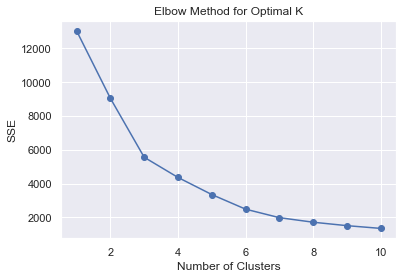

In [58]:
sse = []
for k in range(1,11):
    kmeans= KMeans(n_clusters=k,random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1,11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title("Elbow Method for Optimal K")
plt.show()    

In [59]:
kmeans = KMeans(n_clusters=5,random_state=42)
rfm_df['KMeans_Cluster'] = kmeans.fit_predict(rfm_scaled)

In [60]:
rfm_df

,Recency,Frequency,Monetary,KMeans_Cluster
0,4,181,550416.0,0
1,77,27,257404.0,0
2,20,72,176613.0,0
3,18,16,41976.0,0
4,9,84,151822.0,0
...,...,...,...,...
4344,17,10,20480.0,0
4345,181,7,10774.0,1
4346,12,13,24962.0,0
4347,4,751,279720.0,3


In [61]:
rfm_df['KMeans_Cluster'].value_counts()

0    3407
1     595
3     332
2      11
4       4
Name: KMeans_Cluster, dtype: int64

# Part 3 - DBSCAN

In [62]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
rfm_df['DBSCAN_Cluster'] = dbscan.fit_predict(rfm_scaled)
rfm_df

,Recency,Frequency,Monetary,KMeans_Cluster,DBSCAN_Cluster
0,4,181,550416.0,0,0
1,77,27,257404.0,0,0
2,20,72,176613.0,0,0
3,18,16,41976.0,0,0
4,9,84,151822.0,0,0
...,...,...,...,...,...
4344,17,10,20480.0,0,0
4345,181,7,10774.0,1,0
4346,12,13,24962.0,0,0
4347,4,751,279720.0,3,0


In [63]:
rfm_df['DBSCAN_Cluster'].value_counts()

 0    4330
-1      19
Name: DBSCAN_Cluster, dtype: int64